In [15]:
import cv2
import matplotlib.pyplot as plt
from os.path import join


In [2]:
from openvino.inference_engine import IEPlugin, IENetwork

In [3]:
### Initialize device
plugin = IEPlugin(device="CPU")

In [4]:
### Load the model
model = "person-detection-retail-0013"
path = "intel/person-detection-retail-0013/FP32"

net = IENetwork(model=join(path, model + ".xml"), weights=join(path, model + ".bin"))

In [5]:
#### model information
#### https://docs.openvinotoolkit.org/2018_R5/_docs_Retail_object_detection_pedestrian_rmnet_ssd_0013_caffe_desc_person_detection_retail_0013.html


In [6]:
input_blob=next(iter(net.inputs))
output_blob=next(iter(net.outputs))

In [7]:
input_blob

'data'

In [8]:
output_blob

'detection_out'

In [9]:
print(net.batch_size)
net.batch_size = 1
print(net.batch_size)
print(net.inputs['data'].shape)

1
1
[1, 3, 320, 544]


In [13]:
### Load the network
#plugin.add_cpu_extension("/opt/intel/openvino/inference_engine/lib/intel64/libcpu_extension_avx2.so")
plugin.add_cpu_extension("cpu_extension_avx2.dll")
exec_net = plugin.load(network=net)

In [17]:
image = cv2.imread("people.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

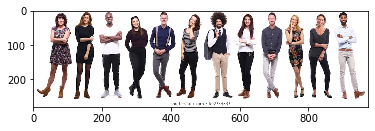

In [18]:
plt.imshow(image)


In [19]:
blob = cv2.dnn.blobFromImage(image, size=(544, 320))

In [20]:
blob.shape

(1, 3, 320, 544)

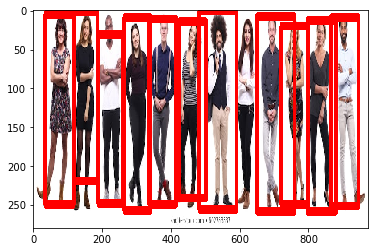

In [23]:
handle = exec_net.start_async(request_id=0, inputs={input_blob: blob})
status = handle.wait()
res = handle.outputs[output_blob]
for item in next(iter(next(iter(res)))):
    image_id = item[0]
    label = item[1]
    conf = item[2]
    x1 = int (item[3] * image.shape[1])
    y1 = int (item[4] * image.shape[0])
    x2 = int (item[5] * image.shape[1])
    y2 = int (item[6] * image.shape[0])
    
    # put you app logic here
    if conf > 0.3:
        cv2.rectangle(image, (x1,y1), (x2,y2), (255,0,0), 10)
    
    
        
cv2.imwrite("output.jpg", image)
#image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )
#plt.figure(figsize = (20,2))
plt.imshow(image, aspect='auto')
    